# Предобработка текста

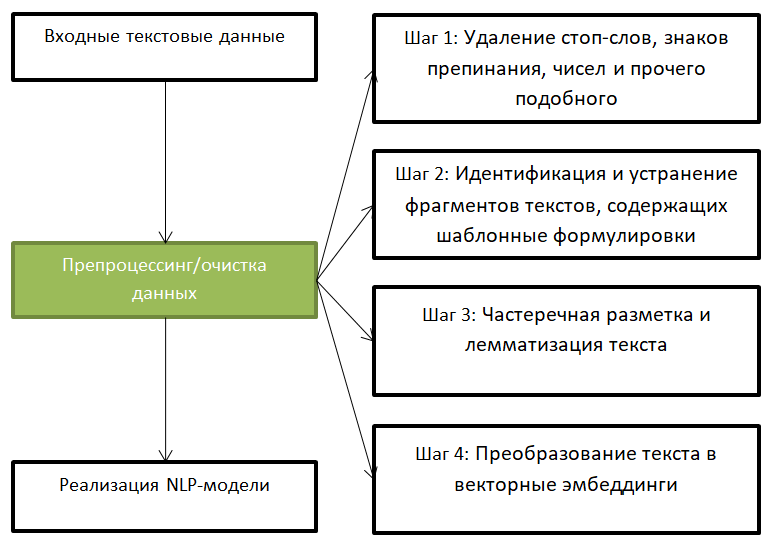

In [27]:
from google.colab import drive
import re
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
drive.mount("/content/drive")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder = "/content/drive/MyDrive/my_projects"
file_path = os.path.join(folder, "Дубровский.txt")
with open(file_path, 'r') as f:
    data = f.read()
data

'Несколько лет тому назад в одном из своих поместий жил старинный русской барин, Кирила Петрович Троекуров. Его богатство, знатный род и связи давали ему большой вес в губерниях, где находилось его имение. Соседи рады были угождать малейшим его прихотям; губернские чиновники трепетали при его имени; Кирила Петрович принимал знаки подобострастия как\nнадлежащую дань; дом его всегда был полон гостями, готовыми тешить его барскую праздность,\nразделяя шумные, а иногда и буйные его увеселения. Никто не дерзал отказываться от его приглашения, или в известные дни не являться с должным почтением в село Покровское. В домашнем быту Кирила Петрович выказывал все пороки человека необразованного. Избалованный\nвсем, что только окружало его, он привык давать полную волю всем порывам пылкого своего\nнрава и всем затеям довольно ограниченного ума. Не смотря на необыкновенную силу физических способностей, он раза два в неделю страдал от обжорства и каждый вечер бывал навеселе.\nВ одном из флигелей его

In [37]:
def clean_text(text):
    cl_text = re.sub('100 лучших книг всех времен: www.100bestbooks.ru', '', text)
    cl_text = re.sub(r'[^а-яА-Я0-9\s.]', '', cl_text)
    cl_text = re.sub('\s+', ' ', cl_text)
    cl_text = cl_text.lower()

    cl_text = word_tokenize(cl_text)

    stop_words = set()
    # stop_words = set(stopwords.words('russian'))

    cl_text = [word for word in cl_text if word not in stop_words]
    cl_text = ' '.join(cl_text)
    return cl_text

In [40]:
clean_text(data)[:400]

'несколько лет тому назад в одном из своих поместий жил старинный русской барин кирила петрович троекуров . его богатство знатный род и связи давали ему большой вес в губерниях где находилось его имение . соседи рады были угождать малейшим его прихотям губернские чиновники трепетали при его имени кирила петрович принимал знаки подобострастия как надлежащую дань дом его всегда был полон гостями гото'

## Лемматизация

In [51]:
pip install pymorphy3

In [65]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()
def lemmatize(text):
    lemmas = [morph.parse(token)[0].normal_form for token in text.split(' ')]
    lemmas = ' '.join(lemmas)
    return lemmas
lemma_text = lemmatize(clean_text(data))

In [66]:
lemma_text

'несколько год тот назад в один из свой поместье жить старинный русский барин кирил петрович троекур . он богатство знатный родиться и связь давать он большой вес в губерния где находиться он имение . сосед рада быть угождать малый он прихоть губернский чиновник трепетать при он имя кирил петрович принимать знак подобострастие как надлежащий дань дом он всегда быть полный гость готовый тешить он барский праздность разделять шумный а иногда и буйный он увеселение . никто не дерзать отказываться от он приглашение или в известный день не являться с должный почтение в село покровский . в домашний быт кирил петрович выказывать всё порок человек необразованный . избаловать весь что только окружать он он привыкнуть давать полный воля весь порыв пылкий свой нрав и весь затея довольно ограниченный ум . не смотреть на необыкновенный сила физический способность он раз два в неделя страдать от обжорство и каждый вечер бывать навеселе . в один из флигель он дом жить 16 горничная заниматься рукодели

## Эмбеддинги


### Word2Vec
